# Gridded reference ET0

## Introduction

SWB version 2.0 will accept gridded daily or monthly reference (potential) evapotranspiration; if these data are supplied, the internal reference ET0 calculations are disabled.

## Preliminaries


In [1]:
import os
import numpy as np
import pandas as pd
import gdal

%run ../../COMMON/plot_and_table_functions.py

# grid files
reference_et_grid_filename  = '../input/gr0_in_month_ascii/gr0_in_jan__maui.asc'

## Read grid

In [2]:
# read in runoff zone grid
et_data, et_gt, et_proj, et_xy        = read_raster( reference_et_grid_filename )


reading in ../input/gr0_in_month_ascii/gr0_in_jan__maui.asc into numpy array...
creating a grid of xy coordinates in the original projection...


## Input datasets and grids

### Reference ET0 Grid

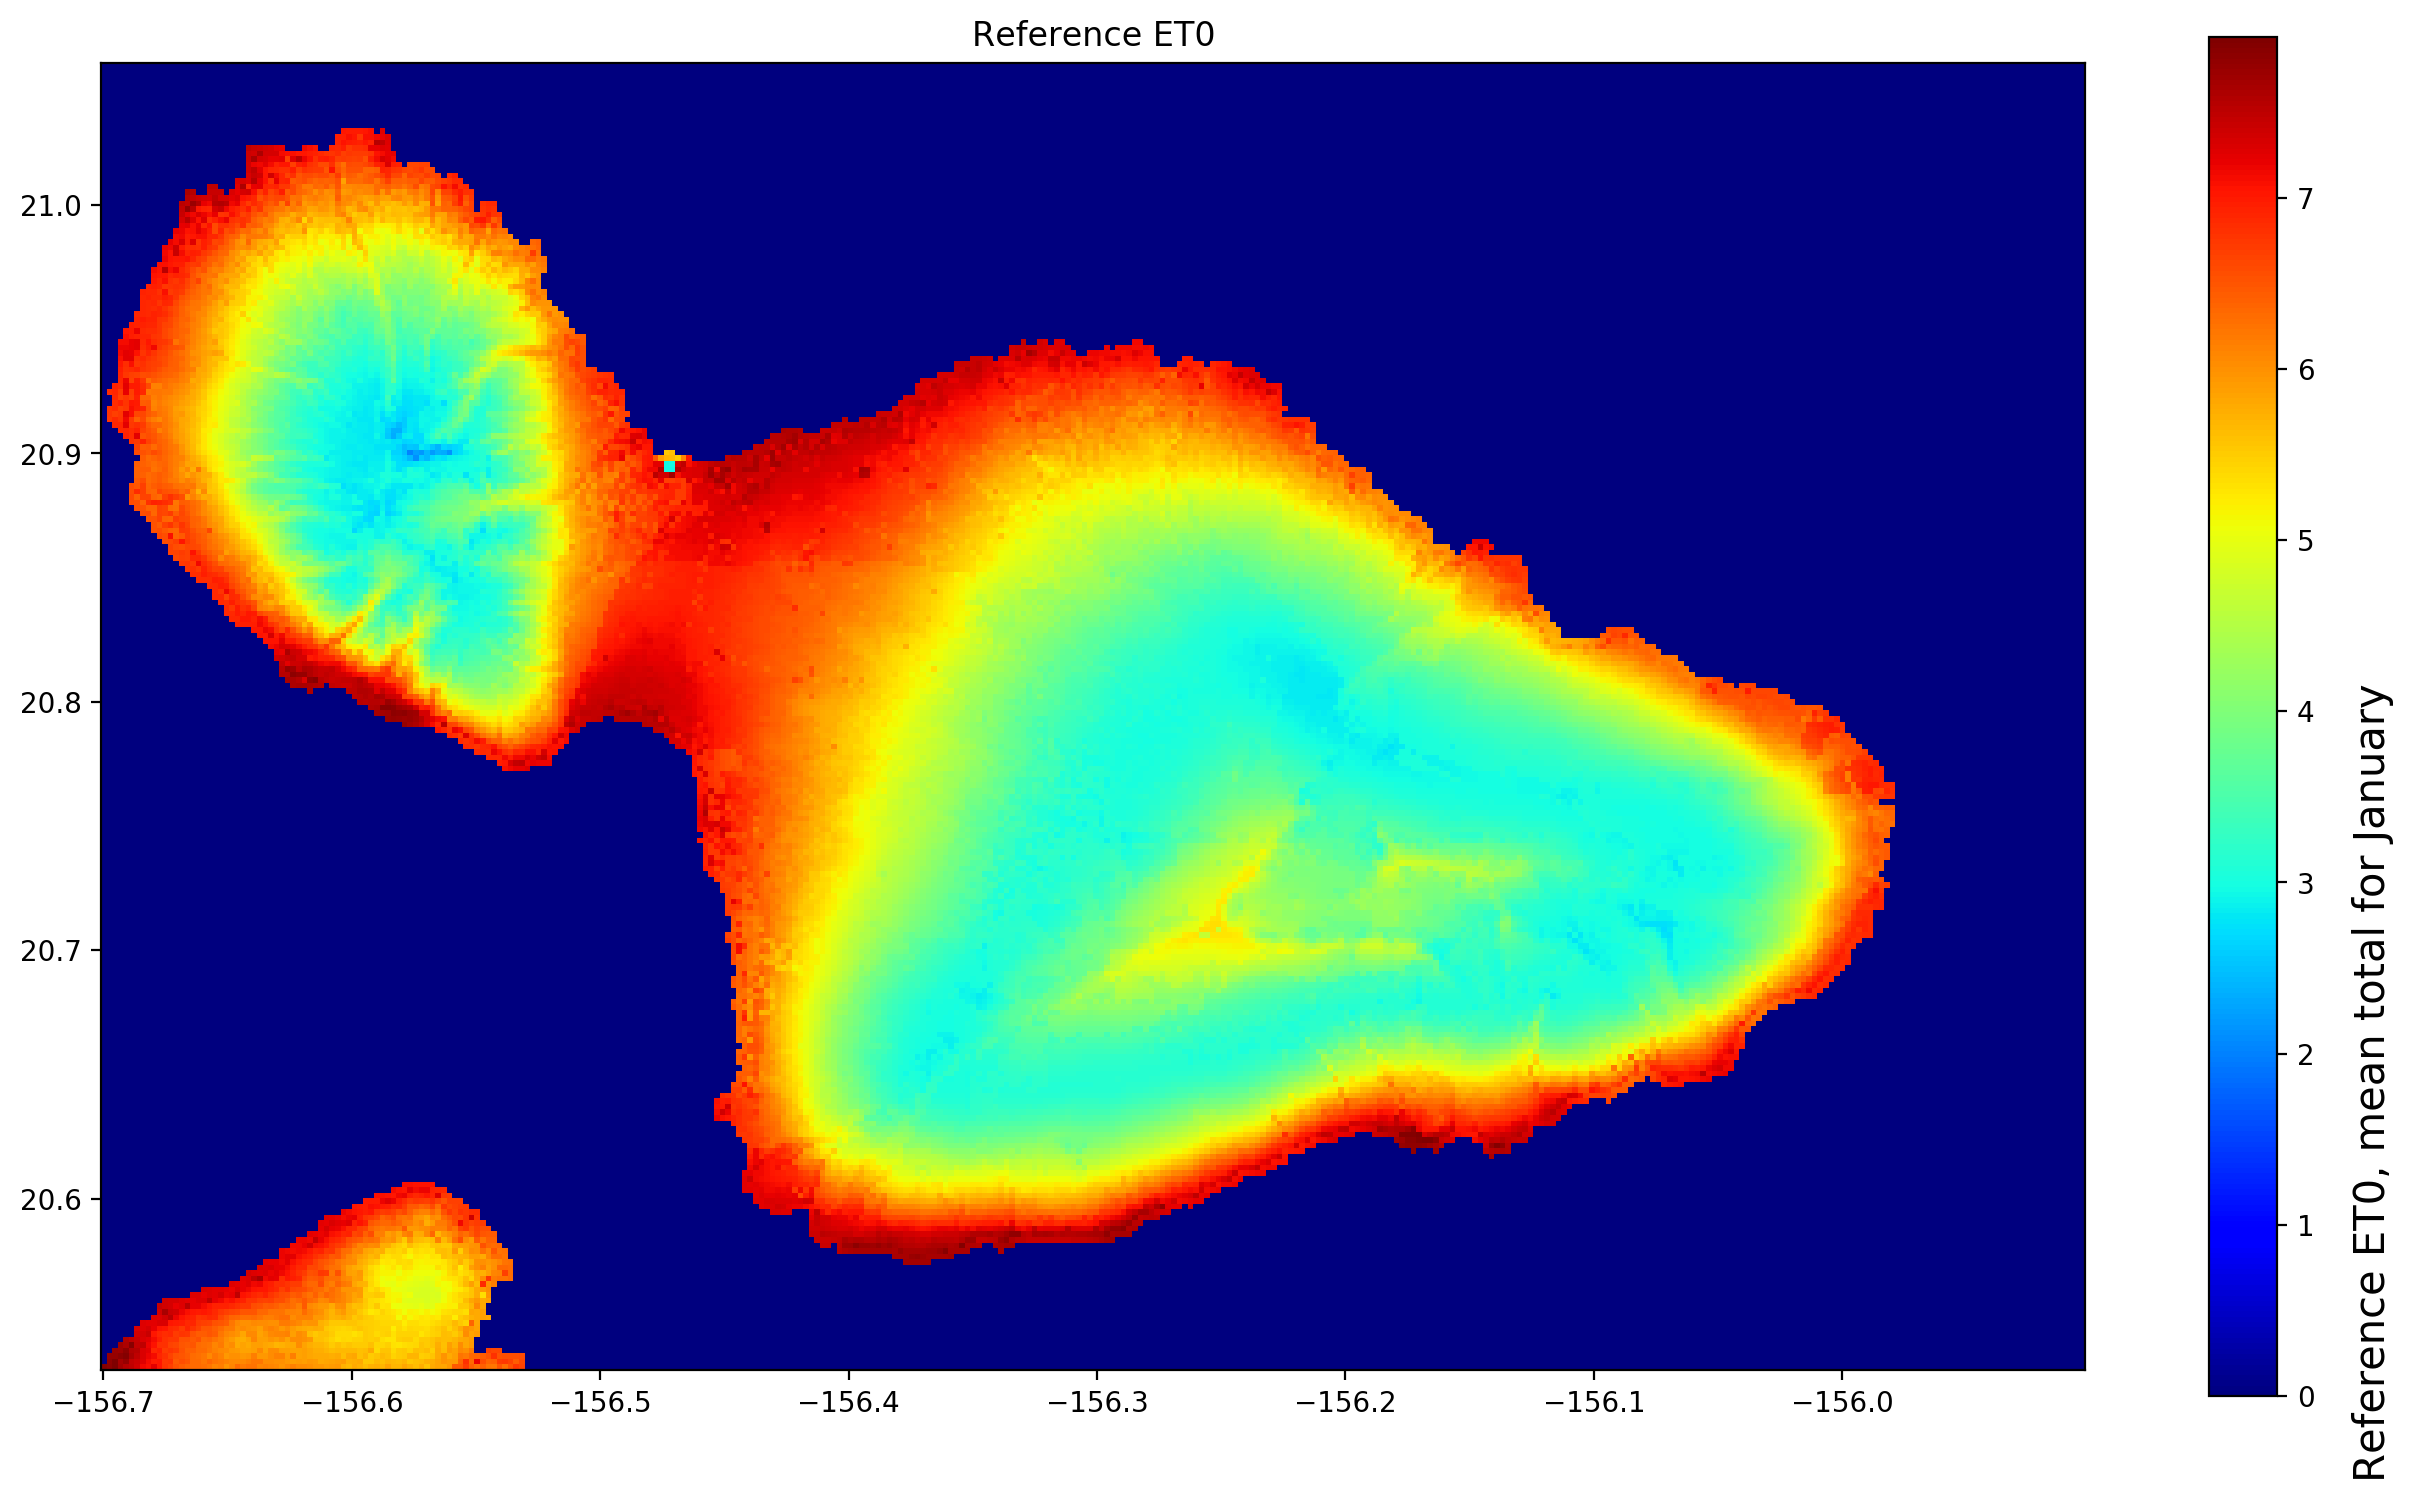

In [3]:
make_plot( x=et_xy[0], y=et_xy[1], var=et_data, discrete=False, title='Reference ET0',
           barlabel='Reference ET0, mean total for January', minz=0. )

## Application

If reference ET0 is supplied in the form of monthly grids, SWB will divide the monthly sum by the number of days in the month to arrive at the reference ET0 value used in water balance calculations.

## Control File Entries

In order to use gridded data as reference ET0, the control file syntax must be changed to indicate that gridded data are to be used for reference ET0 values:

```
EVAPOTRANSPIRATION_METHOD    MONTHLY_GRID
```

Additionally, the gridded data source and projection must be specified in the control file:

```
REFERENCE_ET0 ARC_GRID input/gr0_in_month_ascii/gr0_in_%b__maui.asc
REFERENCE_ET0_PROJECTION_DEFINITION +proj=lonlat +datum=WGS84 +no_defs
```

If a series of daily reference ET0 grids are available, the control file syntax would be `EVAPOTRANSPIRATION_METHOD DAILY_GRID`.